Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

## Laboratório 13 - K-Nearest Neighbors


---
> 👨‍🏫*Professor Dr. Rooney Coelho (rracoelho@pucsp.br)*
---

**K-Nearest Neighbors** é um algoritmo para aprendizado `supervisionado`. Onde os dados são 'treinados' com pontos de dados correspondentes à sua classificação. Uma vez que um ponto deve ser previsto, ele leva em consideração os 'K' pontos mais próximos a ele para determinar sua classificação.

### Aqui está uma visualização do algoritmo K-Nearest Neighbors.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png" width=50%>



Neste caso, temos pontos de dados de Classe A e B. Queremos prever qual é a estrela (ponto de dados de teste). Se considerarmos um valor de k de 3 (3 pontos de dados mais próximos), obteremos uma previsão de Classe B. No entanto, se considerarmos um valor de k de 6, obteremos uma previsão de Classe A.


Nesse sentido, é importante considerar o valor de k. Mas espero que, a partir deste diagrama, você tenha uma noção do que é o algoritmo K-Nearest Neighbors. Considera os 'K' Vizinhos Mais Próximos (pontos) quando prevê a classificação do ponto de teste.

In [59]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score

## Sobre o conjunto de dados


Imagine que um provedor de telecomunicações tenha segmentado sua base de clientes por padrões de uso de serviço, categorizando os clientes em quatro grupos. Se os dados demográficos puderem ser usados para prever a associação ao grupo, a empresa poderá personalizar ofertas para clientes potenciais individuais. É um problema de classificação. Ou seja, dado o conjunto de dados, com rótulos predefinidos, precisamos construir um modelo a ser usado para prever a classe de um caso novo ou desconhecido.

O exemplo se concentra no uso de dados demográficos, como região, idade e casamento, para prever padrões de uso.

O campo de destino, chamado **custcat**, tem quatro valores possíveis que correspondem aos quatro grupos de clientes, da seguinte forma:
   1- Serviço Básico
   2- Serviço Eletrônico
   3- Serviço Adicional
   4- Serviço Total

Nosso objetivo é construir um classificador, para prever a classe de casos desconhecidos. Usaremos um tipo específico de classificação chamado K vizinho mais próximo.

### Carregar dados do arquivo CSV


In [60]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/teleCust1000t.csv'
df = pd.read_csv(url)
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


## Visualização e análise de dados

Veja quantas classes diferentes estão em `custcat` em nosso conjunto de dados e a contagem dos clientes em cada classe.

In [61]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

### Conjunto de características


Defina as features com `X`, onde todas as colunas com exceção de `custcat` são features.


In [62]:
features = df.drop('custcat', axis=1)

Defina `y` como seu alvo para a previsão.


In [63]:
target = df['custcat']

## Normalizar dados


A padronização de dados fornece média zero aos dados e variância de unidade, é uma boa prática, especialmente para algoritmos como KNN, que é baseado na distância dos casos:

In [64]:
scaler = StandardScaler()

scaled_feature = scaler.fit_transform(features)

### Train Test Split

A precisão fora da amostra é a porcentagem de previsões corretas que o modelo faz em dados nos quais o modelo NÃO foi treinado. Fazer um treinamento e um teste no mesmo conjunto de dados provavelmente terá uma baixa precisão fora da amostra, devido à probabilidade de ajuste excessivo.

É importante que nossos modelos tenham uma precisão alta, fora da amostra, porque o objetivo de qualquer modelo, é claro, é fazer previsões corretas em dados desconhecidos. Então, como podemos melhorar a precisão fora da amostra? Uma maneira é usar uma abordagem de avaliação chamada Train/Test Split.
A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de teste.

Isso fornecerá uma avaliação mais precisa da precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar os dados. É mais realista para problemas do mundo real.


Faça aqui a divisão dos dados em 20% para teste.

In [65]:
features_train, features_test, target_train, target_test = train_test_split(scaled_feature, target, test_size=0.2, random_state=0)

## Classificação usando KNN

### Treinamento

Vamos iniciar o algoritmo com k=4 por enquanto:

In [66]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=4)

### Previsão

podemos usar o modelo para prever o conjunto de teste:


In [67]:
predictions = knn.predict(features_test)

### Avaliação de precisão

Na classificação multirrótulo, **pontuação de classificação de precisão** é uma função que calcula a precisão do subconjunto. Esta função é igual à função jaccard_similarity_score. Essencialmente, ele calcula a proximidade entre os rótulos reais e os rótulos previstos no conjunto de teste.


In [68]:
accuracy_score(target_test, predictions), jaccard_score(target_test, predictions, average='weighted')

(0.295, 0.17278243819266836)

**Obs:** A precisão é bem baixa mesmo!

## Prática

Você pode construir o modelo novamente, mas desta vez com k=6?


In [69]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(features_train, target_train)
predictions = knn.predict(features_test)
accuracy_score(target_test, predictions), jaccard_score(target_test, predictions, average='weighted')

(0.31, 0.18434747332796866)

#### E os outros valores de K?

K em KNN, é o número de vizinhos mais próximos a serem examinados. Deve ser especificado pelo usuário. Então, como podemos escolher o valor certo para K?
A solução geral é reservar uma parte de seus dados para testar a precisão do modelo. Em seguida, escolha k = 1, use a parte de treinamento para modelagem e calcule a precisão da previsão usando todas as amostras em seu conjunto de teste. Repita este processo, aumentando o k, e veja qual k é o melhor para o seu modelo.

Podemos calcular a precisão de KNN para diferentes Ks. Faça aqui uma varredura de $k$ entre 1 e 10 e veja qual desses valores tem a melhor precisão.

In [70]:
k_range = range(1, 11)
scores = {}
jc_scores = {}

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, target_train)
    predictions = knn.predict(features_test)
    scores[k] = accuracy_score(target_test, predictions)
    jc_scores[k] = jaccard_score(target_test, predictions, average='weighted')

scores, jc_scores

({1: 0.23,
  2: 0.26,
  3: 0.28,
  4: 0.295,
  5: 0.32,
  6: 0.31,
  7: 0.34,
  8: 0.34,
  9: 0.325,
  10: 0.355},
 {1: 0.1298971712767953,
  2: 0.13677089421390998,
  3: 0.15850670777885967,
  4: 0.17278243819266836,
  5: 0.19122154139470232,
  6: 0.18434747332796866,
  7: 0.20666675717750987,
  8: 0.20899399775378527,
  9: 0.19551745476745477,
  10: 0.21938559918211667})

#### Precisão do modelo de plotagem para diferentes números de vizinhos

Faça aqui um gráfico dos valores de precisão em função de k:

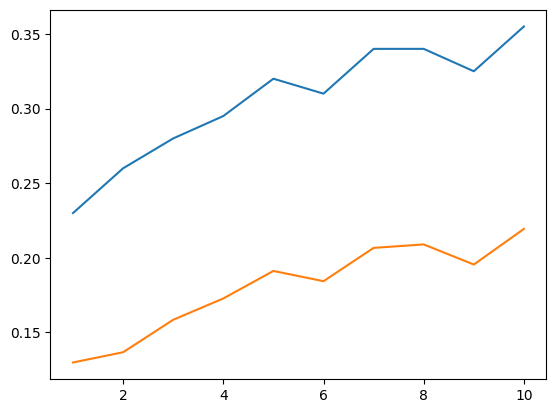

In [71]:
plt.plot(k_range, list(scores.values()))
plt.plot(k_range, list(jc_scores.values()))

Este algoritmo não é o mais preciso de todos, porém ele possibilita a execução de modelos quando se tem um hardware muito limitado, sendo então um importante aliado para machine learning em dispositivos embarcados.